# Declaration of Originality

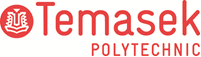

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [21]:
## Import libraries
import pandas as pd
import numpy as np


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [22]:
results = pd.read_csv("archive/results.csv").replace(r"\\N", np.nan)
races = pd.read_csv("archive/races.csv").replace(r"\\N", np.nan)
drivers = pd.read_csv("archive/drivers.csv").replace(r"\\N", np.nan)
constructors = pd.read_csv("archive/constructors.csv").replace(r"\\N", np.nan)
circuits = pd.read_csv("archive/circuits.csv").replace(r"\\N", np.nan)
qualifying = pd.read_csv("archive/qualifying.csv").replace(r"\\N", np.nan)

# ✅ Keep only needed columns (prevents duplicate columns like url)
results = results[["raceId","driverId","constructorId","grid","positionOrder","points"]]
races = races[["raceId","year","round","circuitId","name","date"]]

drivers = drivers[["driverId","dob","nationality"]]
constructors = constructors[["constructorId","nationality"]]
qualifying = qualifying[["raceId","driverId","constructorId","position","q1","q2","q3"]]
circuits = circuits[["circuitId","country","alt","lat","lng"]]

# Merge into one dataset (df)
df = (results.merge(races, on="raceId", how="left")
            .merge(drivers, on="driverId", how="left")
            .merge(constructors, on="constructorId", how="left", suffixes=("_driver", "_constructor"))
            .merge(qualifying, on=["raceId","driverId","constructorId"], how="left")
            .merge(circuits, on="circuitId", how="left")
)
df = df.replace(r"\N", np.nan)
df = df.replace(r"\\N", np.nan)


## 2.2 Summary Statistics

In [23]:
## Understand the type of variable for each column
df.shape


(26759, 22)

In [24]:
## Statistical summary (mean, max, min)
df.describe(include='all')

,raceId,driverId,constructorId,grid,positionOrder,points,year,round,circuitId,name,...,nationality_driver,nationality_constructor,position,q1,q2,q3,country,alt,lat,lng
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759,...,26759,26759,10484.000000,10328,5847,3629,26759,26759.000000,26759.000000,26759.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,...,43,24,NaN,9136,5473,3470,35,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,British Grand Prix,...,British,British,NaN,1:20.888,1:33.416,1:35.766,Italy,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873,...,4559,12248,NaN,4,3,3,2647,NaN,NaN,NaN
mean,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,1991.394372,8.511192,23.820808,NaN,...,NaN,NaN,11.188668,NaN,NaN,NaN,NaN,276.847416,33.949556,5.724416
std,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,19.952885,5.070231,19.112002,NaN,...,NaN,NaN,6.259034,NaN,NaN,NaN,NaN,409.086550,25.246080,57.632776
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-7.000000,-37.849700,-118.189000
25%,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,1977.000000,4.000000,9.000000,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,18.000000,34.843100,-1.016940
50%,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,1991.000000,8.000000,18.000000,NaN,...,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,153.000000,43.734700,6.947500
75%,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,2009.000000,12.000000,34.000000,NaN,...,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,401.000000,49.254200,14.764700


In [25]:

df[["q1","q2","q3"]].isna().sum()

q1    16431
q2    20912
q3    23130
dtype: int64

In [26]:
df.describe(include='all')

,raceId,driverId,constructorId,grid,positionOrder,points,year,round,circuitId,name,...,nationality_driver,nationality_constructor,position,q1,q2,q3,country,alt,lat,lng
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759,...,26759,26759,10484.000000,10328,5847,3629,26759,26759.000000,26759.000000,26759.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,...,43,24,NaN,9136,5473,3470,35,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,British Grand Prix,...,British,British,NaN,1:20.888,1:33.416,1:35.766,Italy,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873,...,4559,12248,NaN,4,3,3,2647,NaN,NaN,NaN
mean,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,1991.394372,8.511192,23.820808,NaN,...,NaN,NaN,11.188668,NaN,NaN,NaN,NaN,276.847416,33.949556,5.724416
std,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,19.952885,5.070231,19.112002,NaN,...,NaN,NaN,6.259034,NaN,NaN,NaN,NaN,409.086550,25.246080,57.632776
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-7.000000,-37.849700,-118.189000
25%,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,1977.000000,4.000000,9.000000,NaN,...,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,18.000000,34.843100,-1.016940
50%,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,1991.000000,8.000000,18.000000,NaN,...,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,153.000000,43.734700,6.947500
75%,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,2009.000000,12.000000,34.000000,NaN,...,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,401.000000,49.254200,14.764700


In [27]:
## Check for missing values
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   raceId                   26759 non-null  int64  
 1   driverId                 26759 non-null  int64  
 2   constructorId            26759 non-null  int64  
 3   grid                     26759 non-null  int64  
 4   positionOrder            26759 non-null  int64  
 5   points                   26759 non-null  float64
 6   year                     26759 non-null  int64  
 7   round                    26759 non-null  int64  
 8   circuitId                26759 non-null  int64  
 9   name                     26759 non-null  object 
 10  date                     26759 non-null  object 
 11  dob                      26759 non-null  object 
 12  nationality_driver       26759 non-null  object 
 13  nationality_constructor  26759 non-null  object 
 14  position              

In [28]:
# 1) Convert date columns to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# 2) Driver age at race (years)
df["driver_age"] = (df["date"] - df["dob"]).dt.days / 365.25

# 3) Convert qualifying position to numeric
df["quali_position"] = pd.to_numeric(df["position"], errors="coerce")

# 4) Convert q1/q2/q3 strings like '1:26.572' into seconds
def time_to_seconds(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == "" or s.lower() == "nan" or s in ["\\N", r"\N"]:

        return np.nan
    parts = s.split(":")
    try:
        if len(parts) == 2:  # M:SS.mmm
            return int(parts[0]) * 60 + float(parts[1])
        elif len(parts) == 3:  # H:MM:SS.mmm (rare)
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
        else:
            return float(s)
    except:
        return np.nan

df["q1_sec"] = df["q1"].apply(time_to_seconds)
df["q2_sec"] = df["q2"].apply(time_to_seconds)
df["q3_sec"] = df["q3"].apply(time_to_seconds)

# 5) Best available qualifying time + flag
df["quali_best_sec"] = df[["q1_sec", "q2_sec", "q3_sec"]].min(axis=1)
df["has_quali"] = (~df["quali_best_sec"].isna()).astype(int)

# Quick check
df[["driver_age", "quali_position", "quali_best_sec", "has_quali"]].isna().sum()

driver_age            0
quali_position    16275
quali_best_sec    16431
has_quali             0
dtype: int64

In [29]:
## Describe data distribution


print("Total columns:", len(df.columns))
print(df.columns.tolist())


Total columns: 29
['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'year', 'round', 'circuitId', 'name', 'date', 'dob', 'nationality_driver', 'nationality_constructor', 'position', 'q1', 'q2', 'q3', 'country', 'alt', 'lat', 'lng', 'driver_age', 'quali_position', 'q1_sec', 'q2_sec', 'q3_sec', 'quali_best_sec', 'has_quali']


In [30]:
engineered = [c for c in df.columns if c.endswith("_sec")] + [
    "quali_best_sec", "has_quali", "quali_position",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date"
]
engineered = [c for c in engineered if c in df.columns]  # keep only existing

print("Engineered features currently present:")
print(engineered)


Engineered features currently present:
['q1_sec', 'q2_sec', 'q3_sec', 'quali_best_sec', 'quali_best_sec', 'has_quali', 'quali_position', 'driver_age']


In [31]:
################################################################
#### 📈 FEATURE ENGINEERING (PAST PERFORMANCE, NO LEAKAGE) 📈
################################################################


# Sort chronologically (important for "last 5 races")
df = df.sort_values(["date", "round", "raceId", "driverId"]).reset_index(drop=True)

# Experience: races completed before this one
df["driver_races_before"] = df.groupby("driverId").cumcount()
df["constructor_races_before"] = df.groupby("constructorId").cumcount()

# Driver last finish + rolling averages (shift(1) avoids using current race result)
df["driver_last_finish"] = df.groupby("driverId")["positionOrder"].shift(1)

df["driver_avg_finish_last5"] = df.groupby("driverId")["positionOrder"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

df["driver_avg_points_last5"] = df.groupby("driverId")["points"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

# Constructor rolling averages (also shifted)
df["constructor_avg_finish_last5"] = df.groupby("constructorId")["positionOrder"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

df["constructor_avg_points_last5"] = df.groupby("constructorId")["points"].transform(
    lambda s: s.shift(1).rolling(5, min_periods=1).mean()
)

# Season points to date (shifted)
df["driver_season_points_to_date"] = df.groupby(["driverId", "year"])["points"].transform(
    lambda s: s.shift(1).fillna(0).cumsum()
)

df["constructor_season_points_to_date"] = df.groupby(["constructorId", "year"])["points"].transform(
    lambda s: s.shift(1).fillna(0).cumsum()
)

# Quick check (new drivers will have NaNs in last_finish)
df[[
    "driver_last_finish",
    "driver_avg_finish_last5",
    "driver_avg_points_last5",
    "constructor_avg_finish_last5",
    "constructor_avg_points_last5"
]].isna().sum()


driver_last_finish              861
driver_avg_finish_last5         861
driver_avg_points_last5         861
constructor_avg_finish_last5    211
constructor_avg_points_last5    211
dtype: int64

In [32]:
################################################################
#### 🧼 HANDLE MISSING VALUES (IMPUTATION) 🧼
################################################################

# For "no history yet" (first race), fill with overall medians
history_cols = [
    "driver_last_finish",
    "driver_avg_finish_last5",
    "driver_avg_points_last5",
    "constructor_avg_finish_last5",
    "constructor_avg_points_last5",
]

for c in history_cols:
    df[c] = df[c].fillna(df[c].median())

# Qualifying missing: keep has_quali flag and fill numeric with medians
df["quali_best_sec"] = df["quali_best_sec"].fillna(df["quali_best_sec"].median())
df["quali_position"] = df["quali_position"].fillna(df["quali_position"].median())

# Driver age (should already be fine, but safe)
df["driver_age"] = df["driver_age"].fillna(df["driver_age"].median())

# Circuit numeric (safe)
df["alt"] = df["alt"].fillna(df["alt"].median())
df["lat"] = df["lat"].fillna(df["lat"].median())
df["lng"] = df["lng"].fillna(df["lng"].median())

# Country missing (rare)
df["country"] = df["country"].fillna("Unknown")

# Check remaining missing
df.isna().sum().sort_values(ascending=False).head(15)


q3                          23130
q3_sec                      23130
q2                          20912
q2_sec                      20912
q1_sec                      16431
q1                          16431
position                    16275
raceId                          0
quali_best_sec                  0
quali_position                  0
has_quali                       0
lng                             0
driver_races_before             0
constructor_races_before        0
driver_last_finish              0
dtype: int64

In [33]:
feature_cols = [
    "year","round","circuitId","alt","lat","lng",
    "grid","has_quali","quali_position","quali_best_sec",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date",
    "driverId","constructorId","country"
]

df[feature_cols].isna().sum().sort_values(ascending=False).head(20)


year                                 0
constructor_races_before             0
constructorId                        0
driverId                             0
constructor_season_points_to_date    0
driver_season_points_to_date         0
constructor_avg_points_last5         0
constructor_avg_finish_last5         0
driver_avg_points_last5              0
driver_avg_finish_last5              0
driver_last_finish                   0
driver_races_before                  0
round                                0
driver_age                           0
quali_best_sec                       0
quali_position                       0
has_quali                            0
grid                                 0
lng                                  0
lat                                  0
dtype: int64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [34]:
## Understanding distribution of target
# Find correlation
df.corr(numeric_only=True)

,raceId,driverId,constructorId,grid,positionOrder,points,year,round,circuitId,position,...,has_quali,driver_races_before,constructor_races_before,driver_last_finish,driver_avg_finish_last5,driver_avg_points_last5,constructor_avg_finish_last5,constructor_avg_points_last5,driver_season_points_to_date,constructor_season_points_to_date
raceId,1.000000,0.753768,0.439926,-0.033888,-0.076786,0.242543,0.091595,0.057888,0.262548,-0.039891,...,0.189844,0.110378,0.106019,-0.084559,-0.117020,0.299272,-0.113447,0.305032,0.274777,0.299542
driverId,0.753768,1.000000,0.322572,0.051541,-0.015473,0.052361,0.064487,0.016931,0.181952,0.103982,...,0.182918,-0.187598,0.039708,-0.026040,-0.032893,0.062472,-0.045614,0.088519,0.068349,0.106495
constructorId,0.439926,0.322572,1.000000,0.103062,0.080735,-0.049738,-0.166254,-0.072824,0.136388,0.187604,...,-0.030315,-0.071161,-0.404521,0.063324,0.086229,-0.057765,0.106387,-0.060775,-0.051629,-0.040867
grid,-0.033888,0.051541,0.103062,1.000000,0.165097,-0.375658,-0.016940,0.007228,-0.002405,0.943240,...,-0.021722,-0.193646,-0.184964,0.232482,0.307779,-0.380246,0.287785,-0.360641,-0.293047,-0.289311
positionOrder,-0.076786,-0.015473,0.080735,0.165097,1.000000,-0.576483,-0.107401,-0.020986,-0.004430,0.576216,...,-0.166730,-0.233946,-0.224886,0.381968,0.499577,-0.368623,0.499484,-0.354823,-0.294351,-0.294169
points,0.242543,0.052361,-0.049738,-0.375658,-0.576483,1.000000,0.288615,0.095933,0.000116,-0.576203,...,0.294006,0.341045,0.315056,-0.312137,-0.418844,0.709379,-0.405900,0.679851,0.613166,0.597379
year,0.091595,0.064487,-0.166254,-0.016940,-0.107401,0.288615,1.000000,0.337228,-0.176449,-0.083221,...,0.791274,0.474239,0.443349,-0.086124,-0.123577,0.350013,-0.141005,0.359884,0.355319,0.335344
round,0.057888,0.016931,-0.072824,0.007228,-0.020986,0.095933,0.337228,1.000000,0.129265,-0.017682,...,0.210520,0.212771,0.163953,-0.013956,-0.023606,0.116808,-0.024399,0.119604,0.395088,0.403891
circuitId,0.262548,0.181952,0.136388,-0.002405,-0.004430,0.000116,-0.176449,0.129265,1.000000,-0.024607,...,-0.165976,-0.045220,-0.061270,-0.003238,-0.004426,0.000830,0.004223,-0.002805,0.063636,0.074650
position,-0.039891,0.103982,0.187604,0.943240,0.576216,-0.576203,-0.083221,-0.017682,-0.024607,1.000000,...,-0.157920,-0.303632,-0.293434,0.504950,0.678736,-0.588822,0.677129,-0.583011,-0.476608,-0.477764


### 2.3.1.2 Understanding distribution of features

In [35]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [36]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [37]:
## Clean data

## 3.2 Train-Test Split

In [38]:
# Use modern era (qualifying data is reliable)
df_model = df[df["year"] >= 2006].copy()
df_model["date"] = pd.to_datetime(df_model["date"], errors="coerce")



In [39]:
## Split data into train set and test set (COMPARE 2 MODELS)
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr

# 1) Define features + target
feature_cols = [
    "year","round","circuitId","alt","lat","lng",
    "grid","has_quali","quali_position","quali_best_sec",
    "driver_age",
    "driver_races_before","constructor_races_before",
    "driver_last_finish","driver_avg_finish_last5","driver_avg_points_last5",
    "constructor_avg_finish_last5","constructor_avg_points_last5",
    "driver_season_points_to_date","constructor_season_points_to_date",
    "driverId","constructorId","country"
]
target = "positionOrder"

# 2) Filter era FIRST
df_model = df[df["year"] >= 2006].copy()
df_model["date"] = pd.to_datetime(df_model["date"], errors="coerce")
df_model = df_model.dropna(subset=["date"]).copy()

# 3) Build X/y from df_model
X = df_model[feature_cols].copy()
y = df_model[target].astype(float).copy()

# One-hot encode
X = pd.get_dummies(X, columns=["driverId","constructorId","circuitId","country"], drop_first=True)

# 4) Time split
cutoff = df_model["date"].quantile(0.8)
train_idx = df_model["date"] <= cutoff
test_idx  = df_model["date"] > cutoff

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

print("Train rows:", X_train.shape[0], "| Test rows:", X_test.shape[0])
print("Cutoff date:", cutoff.date())

# Helper to evaluate a model consistently
def eval_model(name, model, X_test, y_test):
    pred = model.predict(X_test)
    abs_err = np.abs(y_test.values - pred)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    median_ae = np.median(abs_err)
    thr95 = np.quantile(abs_err, 0.95)
    trimmed_mae_95 = abs_err[abs_err <= thr95].mean()
    rho, _ = spearmanr(y_test.values, pred)

    within1 = (abs_err <= 1).mean()
    within2 = (abs_err <= 2).mean()
    within3 = (abs_err <= 3).mean()
    within5 = (abs_err <= 5).mean()

    pred_round = np.clip(np.rint(pred), 1, 40)
    exact_count = (np.abs(y_test.values - pred_round) == 0).sum()
    exact_pct = exact_count / len(y_test)

    return {
        "model": name,
        "MAE": mae,
        "RMSE": rmse,
        "MedianAE": median_ae,
        "TrimMAE95": trimmed_mae_95,
        "P95_abs_err": thr95,
        "Within±1": within1,
        "Within±2": within2,
        "Within±3": within3,
        "Within±5": within5,
        "Exact(rounded)%": exact_pct,
        "Spearman": rho
    }, pred

# -------------------------
# Model 1: Your current one
# -------------------------
gbr = GradientBoostingRegressor(random_state=2025)
gbr.fit(X_train, y_train)
gbr_metrics, gbr_pred = eval_model("GradientBoostingRegressor", gbr, X_test, y_test)

# -------------------------
# Model 2: Best candidate
# -------------------------
hgb = HistGradientBoostingRegressor(
    loss="absolute_error",
    learning_rate=0.05,
    max_depth=8,
    max_iter=800,
    min_samples_leaf=20,
    l2_regularization=0.1,
    random_state=2025,
    early_stopping=True
)
hgb.fit(X_train, y_train)
hgb_metrics, hgb_pred = eval_model("HistGradientBoosting(abs_error)", hgb, X_test, y_test)

# -------------------------
# Baseline (grid)
# -------------------------
baseline = df_model.loc[test_idx, "grid"].astype(float).values
baseline_abs_err = np.abs(y_test.values - baseline)
baseline_metrics = {
    "model": "Baseline(grid)",
    "MAE": mean_absolute_error(y_test, baseline),
    "RMSE": np.sqrt(mean_squared_error(y_test, baseline)),
    "MedianAE": np.median(baseline_abs_err),
    "TrimMAE95": baseline_abs_err[baseline_abs_err <= np.quantile(baseline_abs_err, 0.95)].mean(),
    "P95_abs_err": np.quantile(baseline_abs_err, 0.95),
    "Within±1": (baseline_abs_err <= 1).mean(),
    "Within±2": (baseline_abs_err <= 2).mean(),
    "Within±3": (baseline_abs_err <= 3).mean(),
    "Within±5": (baseline_abs_err <= 5).mean(),
    "Exact(rounded)%": (baseline_abs_err == 0).mean(),
    "Spearman": spearmanr(y_test.values, baseline)[0]
}

# Show comparison table
results_table = pd.DataFrame([gbr_metrics, hgb_metrics, baseline_metrics])
results_table = results_table.set_index("model").sort_values("MAE")
results_table


Train rows: 6335 | Test rows: 1579
Cutoff date: 2021-08-01


,MAE,RMSE,MedianAE,TrimMAE95,P95_abs_err,Within±1,Within±2,Within±3,Within±5,Exact(rounded)%,Spearman
model,,,,,,,,,,,
HistGradientBoosting(abs_error),2.963269,4.261774,2.004206,2.434694,9.300030,0.274224,0.499683,0.647878,0.832806,0.132362,0.691460
GradientBoostingRegressor,3.566460,4.463093,2.965980,3.188545,8.747954,0.164028,0.326789,0.504750,0.752375,0.078531,0.642519
Baseline(grid),3.727042,5.510138,2.000000,3.092482,13.000000,0.360355,0.522483,0.633946,0.781507,0.150095,0.554068


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr

def metrics_block(name, y_true, pred_vals):
    abs_err = np.abs(y_true - pred_vals)

    mae = mean_absolute_error(y_true, pred_vals)
    rmse = np.sqrt(mean_squared_error(y_true, pred_vals))
    med = np.median(abs_err)

    thr95 = np.quantile(abs_err, 0.95)
    trim95 = abs_err[abs_err <= thr95].mean()

    within1 = (abs_err <= 1).mean()
    within2 = (abs_err <= 2).mean()
    within3 = (abs_err <= 3).mean()
    within5 = (abs_err <= 5).mean()

    pred_round = np.clip(np.rint(pred_vals), 1, 40)
    exact = (np.abs(y_true - pred_round) == 0).mean()

    rho, _ = spearmanr(y_true, pred_vals)

    return {
        "model": name,
        "MAE": mae,
        "RMSE": rmse,
        "MedianAE": med,
        "TrimMAE95": trim95,
        "P95_abs_err": thr95,
        "Within±1": within1,
        "Within±2": within2,
        "Within±3": within3,
        "Within±5": within5,
        "Exact(rounded)%": exact,
        "Spearman": rho
    }

# y_test is a pandas Series; convert once
y_true = y_test.values

# Predictions from your compare-cell variables:
# - hgb_pred
# - gbr_pred
# Baseline uses grid
baseline_pred = df_model.loc[test_idx, "grid"].astype(float).values

rows = []
rows.append(metrics_block("HistGradientBoosting(abs_error)", y_true, hgb_pred))
rows.append(metrics_block("GradientBoostingRegressor", y_true, gbr_pred))
rows.append(metrics_block("Baseline(grid)", y_true, baseline_pred))

compare_outliers = pd.DataFrame(rows).set_index("model").sort_values("MAE")
compare_outliers

,MAE,RMSE,MedianAE,TrimMAE95,P95_abs_err,Within±1,Within±2,Within±3,Within±5,Exact(rounded)%,Spearman
model,,,,,,,,,,,
HistGradientBoosting(abs_error),2.963269,4.261774,2.004206,2.434694,9.300030,0.274224,0.499683,0.647878,0.832806,0.132362,0.691460
GradientBoostingRegressor,3.566460,4.463093,2.965980,3.188545,8.747954,0.164028,0.326789,0.504750,0.752375,0.078531,0.642519
Baseline(grid),3.727042,5.510138,2.000000,3.092482,13.000000,0.360355,0.522483,0.633946,0.781507,0.150095,0.554068


In [44]:
drivers_raw = pd.read_csv("archive/drivers.csv").replace(r"\\N", np.nan)

# Prefer forename + surname if available
if "forename" in drivers_raw.columns and "surname" in drivers_raw.columns:
    drivers_raw["driver_name"] = drivers_raw["forename"].fillna("") + " " + drivers_raw["surname"].fillna("")
else:
    # fallback (usually exists)
    drivers_raw["driver_name"] = drivers_raw.get("driverRef", drivers_raw["driverId"].astype(str))

id_to_name = drivers_raw.set_index("driverId")["driver_name"].to_dict()

In [45]:
# Build the full design matrix exactly like training (same get_dummies call)
X_all = pd.get_dummies(
    df[feature_cols].copy(),
    columns=["driverId","constructorId","circuitId","country"],
    drop_first=True
)

X_columns = X_all.columns  # save this for reindexing later


In [68]:
import numpy as np
import pandas as pd

def _make_X_for_model(race_df, model, feature_cols):
    """
    Build race features and align to the exact columns used when 'model' was fitted.
    """
    X_race = pd.get_dummies(
        race_df[feature_cols].copy(),
        columns=["driverId", "constructorId", "circuitId", "country"],
        drop_first=True
    )

    # Align to model's fitted columns (prevents feature-name mismatch)
    if hasattr(model, "feature_names_in_"):
        fitted_cols = list(model.feature_names_in_)
        X_race = X_race.reindex(columns=fitted_cols, fill_value=0)
    else:
        X_race = X_race.reindex(columns=X_columns, fill_value=0)

    return X_race


def predict_driver_season_compare(
    year, driver_id, model_a, model_b,
    name_a="HGB", name_b="GBR",
    drop_threshold=10,             # <-- outlier rule: drop >= 10 places from grid
    show_excluded=True             # <-- set False if you don't want to print excluded races
):
    # Use df_model if it exists (recommended), else fall back to df
    data_source = df_model if "df_model" in globals() else df

    season_races = races[races["year"] == year].sort_values("round").copy()
    if season_races.empty:
        print("No races found for year =", year)
        return None

    driver_name = id_to_name.get(driver_id, str(driver_id))
    print(f"Driver: {driver_name} (driverId={driver_id}) | Season: {year}")
    print(f"Models: {name_a} vs {name_b}")
    print(f"Total rounds in season: {len(season_races)}")
    print(f"Outlier rule: exclude races where (actual_positionOrder - grid) >= {drop_threshold}\n")

    rows = []

    for _, r in season_races.iterrows():
        race_id = int(r["raceId"])
        rnd = int(r["round"])
        circuit_id = int(r["circuitId"])
        race_name = r["name"] if "name" in season_races.columns else f"Round {rnd}"

        race_df = data_source[data_source["raceId"] == race_id].copy()
        if race_df.empty:
            continue

        # Build X for each model using their own fitted columns
        Xa = _make_X_for_model(race_df, model_a, feature_cols)
        Xb = _make_X_for_model(race_df, model_b, feature_cols)

        # Predict all drivers -> rank within race
        race_a = race_df.copy()
        race_a["pred_score"] = model_a.predict(Xa)
        race_a = race_a.sort_values("pred_score").reset_index(drop=True)
        race_a["pred_position"] = np.arange(1, len(race_a) + 1)

        race_b = race_df.copy()
        race_b["pred_score"] = model_b.predict(Xb)
        race_b = race_b.sort_values("pred_score").reset_index(drop=True)
        race_b["pred_position"] = np.arange(1, len(race_b) + 1)

        # Pull this driver's row
        a_row = race_a[race_a["driverId"] == driver_id]
        b_row = race_b[race_b["driverId"] == driver_id]
        actual_row = race_df[race_df["driverId"] == driver_id]

        if actual_row.empty:
            rows.append({
                "year": year, "round": rnd, "raceId": race_id,
                "race_name": race_name, "circuitId": circuit_id,
                "driverId": driver_id, "driver_name": driver_name,
                "grid": np.nan, "actual_positionOrder": np.nan,
                f"{name_a}_pred_position": np.nan, f"{name_a}_pred_score": np.nan,
                f"{name_b}_pred_position": np.nan, f"{name_b}_pred_score": np.nan,
            })
            continue

        actual_row = actual_row.iloc[0]
        grid_val = int(actual_row["grid"])
        actual_finish = int(actual_row["positionOrder"])

        a_pos = int(a_row.iloc[0]["pred_position"]) if not a_row.empty else np.nan
        a_score = float(a_row.iloc[0]["pred_score"]) if not a_row.empty else np.nan

        b_pos = int(b_row.iloc[0]["pred_position"]) if not b_row.empty else np.nan
        b_score = float(b_row.iloc[0]["pred_score"]) if not b_row.empty else np.nan

        rows.append({
            "year": year, "round": rnd, "raceId": race_id,
            "race_name": race_name, "circuitId": circuit_id,
            "driverId": driver_id, "driver_name": driver_name,
            "grid": grid_val,
            "actual_positionOrder": actual_finish,
            f"{name_a}_pred_position": a_pos, f"{name_a}_pred_score": a_score,
            f"{name_b}_pred_position": b_pos, f"{name_b}_pred_score": b_score,
        })

    out = pd.DataFrame(rows).sort_values("round")

    # Add per-race absolute errors
    out[f"{name_a}_abs_error"] = (out[f"{name_a}_pred_position"] - out["actual_positionOrder"]).abs()
    out[f"{name_b}_abs_error"] = (out[f"{name_b}_pred_position"] - out["actual_positionOrder"]).abs()

    # Better model label
    out["better_model"] = np.where(
        out[f"{name_a}_abs_error"] < out[f"{name_b}_abs_error"], name_a,
        np.where(out[f"{name_b}_abs_error"] < out[f"{name_a}_abs_error"], name_b, "tie")
    )

    # -----------------------------
    # Outlier filtering for accuracy
    # -----------------------------
    out["grid_drop"] = out["actual_positionOrder"] - out["grid"]
    out["drop_from_accuracy"] = out["grid_drop"] >= drop_threshold

    valid = out.dropna(subset=["actual_positionOrder", f"{name_a}_pred_position", f"{name_b}_pred_position", "grid"]).copy()

    # BEFORE filter
    if not valid.empty:
        mae_a_full = valid[f"{name_a}_abs_error"].mean()
        mae_b_full = valid[f"{name_b}_abs_error"].mean()

        # AFTER filter
        valid_filt = valid[~valid["drop_from_accuracy"]].copy()
        mae_a_filt = valid_filt[f"{name_a}_abs_error"].mean() if len(valid_filt) else np.nan
        mae_b_filt = valid_filt[f"{name_b}_abs_error"].mean() if len(valid_filt) else np.nan

        print("=== Season MAE (BEFORE vs AFTER outlier filter) ===")
        print("Races counted (full):", len(valid))
        print("Races excluded:", int(valid["drop_from_accuracy"].sum()))
        print("Races counted (filtered):", len(valid_filt))

        print(f"\n{name_a} MAE full:     {mae_a_full:.4f}")
        print(f"{name_a} MAE filtered: {mae_a_filt:.4f}")

        print(f"\n{name_b} MAE full:     {mae_b_full:.4f}")
        print(f"{name_b} MAE filtered: {mae_b_filt:.4f}")

        if show_excluded:
            excluded = valid[valid["drop_from_accuracy"]].copy()
            if not excluded.empty:
                print("\nExcluded races (grid_drop >= threshold):")
                display_cols = ["year","round","race_name","grid","actual_positionOrder","grid_drop",
                                f"{name_a}_pred_position", f"{name_b}_pred_position"]
                print(excluded[display_cols].to_string(index=False))

    return out


# Example run
season_compare = predict_driver_season_compare(
    2022,
    driver_id=1,
    model_a=hgb,
    model_b=gbr,
    name_a="HGB",
    name_b="GBR",
    drop_threshold=10,
    show_excluded=True
)
season_compare


Driver: Lewis Hamilton (driverId=1) | Season: 2022
Models: HGB vs GBR
Total rounds in season: 22
Outlier rule: exclude races where (actual_positionOrder - grid) >= 10

=== Season MAE (BEFORE vs AFTER outlier filter) ===
Races counted (full): 22
Races excluded: 2
Races counted (filtered): 20

HGB MAE full:     3.0455
HGB MAE filtered: 1.8500

GBR MAE full:     3.7727
GBR MAE filtered: 2.5500

Excluded races (grid_drop >= threshold):
 year  round            race_name  grid  actual_positionOrder  grid_drop  HGB_pred_position  GBR_pred_position
 2022     14   Belgian Grand Prix     4                    20         16                  4                  3
 2022     22 Abu Dhabi Grand Prix     5                    18         13                  4                  3


,year,round,raceId,race_name,circuitId,driverId,driver_name,grid,actual_positionOrder,HGB_pred_position,HGB_pred_score,GBR_pred_position,GBR_pred_score,HGB_abs_error,GBR_abs_error,better_model,grid_drop,drop_from_accuracy
0,2022,1,1074,Bahrain Grand Prix,3,1,Lewis Hamilton,5,3,5,4.647270,3,6.259663,2,0,GBR,-2,False
1,2022,2,1075,Saudi Arabian Grand Prix,77,1,Lewis Hamilton,15,10,9,7.879960,6,8.584531,1,4,HGB,-5,False
2,2022,3,1076,Australian Grand Prix,1,1,Lewis Hamilton,5,4,4,4.514438,2,5.932886,0,2,HGB,-1,False
3,2022,4,1077,Emilia Romagna Grand Prix,21,1,Lewis Hamilton,14,13,10,8.841661,6,8.420514,3,7,HGB,-1,False
4,2022,5,1078,Miami Grand Prix,79,1,Lewis Hamilton,6,6,5,5.325890,3,6.638249,1,3,HGB,0,False
5,2022,6,1079,Spanish Grand Prix,4,1,Lewis Hamilton,6,5,6,7.040762,3,7.272451,1,2,HGB,-1,False
6,2022,7,1080,Monaco Grand Prix,6,1,Lewis Hamilton,8,8,8,8.695144,5,8.999765,0,3,HGB,0,False
7,2022,8,1081,Azerbaijan Grand Prix,73,1,Lewis Hamilton,7,4,6,8.033208,4,7.737553,2,0,GBR,-3,False
8,2022,9,1082,Canadian Grand Prix,7,1,Lewis Hamilton,4,3,3,4.662397,2,5.885812,0,1,HGB,-1,False
9,2022,10,1083,British Grand Prix,9,1,Lewis Hamilton,5,3,5,4.587585,2,6.219071,2,1,GBR,-2,False


In [ ]:

#ALL DRIVERS ACROSS YEARS: OUTLIER IMPACT ON MAE
# Use test-only rows (true future)
y_true = y_test.values
pred_best = hgb_pred   # change if needed

test_years = df_model.loc[test_idx, "year"].values
test_grid  = df_model.loc[test_idx, "grid"].astype(float).values

abs_err = np.abs(y_true - pred_best)

# --- Outlier rule: finished >= 10 places worse than grid ---
drop_threshold = 10
grid_drop = y_true - test_grid
drop_from_accuracy = grid_drop >= drop_threshold

# BEFORE filter (normal)
year_mae_before = (
    pd.DataFrame({"year": test_years, "abs_err": abs_err})
      .groupby("year")["abs_err"].mean()
      .sort_index()
)

# AFTER filter (remove crazy drops)
df_filtered = pd.DataFrame({
    "year": test_years,
    "abs_err": abs_err,
    "drop": drop_from_accuracy
})
year_mae_after = (
    df_filtered[~df_filtered["drop"]]
      .groupby("year")["abs_err"].mean()
      .sort_index()
)

# How many removed per year
removed_counts = df_filtered.groupby("year")["drop"].sum().sort_index().astype(int)
total_counts   = df_filtered.groupby("year")["drop"].count().sort_index().astype(int)

# Combine into one table
year_compare = pd.DataFrame({
    "MAE_before": year_mae_before,
    "MAE_after": year_mae_after,
    "rows_total": total_counts,
    "rows_removed": removed_counts,
    "rows_used_after": total_counts - removed_counts
}).sort_index()

year_compare


,MAE_before,MAE_after,rows_total,rows_removed,rows_used_after
year,,,,,
2021,2.865300,2.411704,220,14,206
2022,3.204202,2.387997,440,46,394
2023,3.078538,2.511798,440,41,399
2024,2.681064,2.399457,479,22,457


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Model eval


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection